# ロジスティック回帰で予測するサンプル

In [1]:
import pandas as pd
import numpy as np

import re

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('./datasets/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
test_df = pd.read_csv('./datasets/titanic/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## sexとembarkedのラベルエンコーディング

In [5]:
from sklearn.preprocessing import LabelEncoder
from typing import List

def _label_encode_categorical_cols(df: pd.DataFrame, categorical_cols: List[str]) -> pd.DataFrame:
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
        
    return df

In [6]:
categorical_cols = ["Sex", "Cabin", "Embarked"]

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(columns=['PassengerId', 'Ticket', 'Name'])
    df = _label_encode_categorical_cols(df, categorical_cols)
    return df

In [7]:
prep_df = preprocess(df)
prep_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,34.5,0,0,7.8292,76,1
1,1,3,0,47.0,1,0,7.0000,76,2
2,0,2,1,62.0,0,0,9.6875,76,1
3,0,3,1,27.0,0,0,8.6625,76,2
4,1,3,0,22.0,1,1,12.2875,76,2
...,...,...,...,...,...,...,...,...,...
413,0,3,1,NaN,0,0,8.0500,76,2
414,1,1,0,39.0,0,0,108.9000,22,0
415,0,3,1,38.5,0,0,7.2500,76,2
416,0,3,1,NaN,0,0,8.0500,76,2


In [8]:
prep_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,67.437799,1.401914
std,0.481622,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,19.091405,0.854496
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,76.000000,1.000000
50%,0.000000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,76.000000,2.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,76.000000,2.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,76.000000,2.000000


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## 25%でhold-outしてバリデーションデータを作成

In [10]:
from sklearn.model_selection import train_test_split

# ① 学習用データとバリデーションデータを用意
df_x = prep_df.drop(columns=['Survived'])
df_y = prep_df['Survived']

train_x, valid_x, train_y, valid_y = train_test_split(df_x, df_y, test_size=0.25, random_state=42)

## 学習

In [11]:
import lightgbm as lgbm

train_ds = lgbm.Dataset(
    data=train_x, 
    label=train_y, 
)
validation_ds = lgbm.Dataset(
    data=valid_x, 
    label=valid_y, 
    reference=train_ds,
)

params = {
    'objective': 'binary', # 目的関数
    'num_leaves': 15,   # 木1本あたりの最大葉数  
    'max_depth': 10,    # 木の最大深さ
    'learning_rate': 0.1, # 学習率
    'lambda_l2': 0.01, # 正則化項の重み
    'verbosity': -1,
}

results = {}
model = lgbm.train(
    params=params, 
    train_set=train_ds, 
    valid_sets=[train_ds, validation_ds],
    valid_names = ['train', 'valid'],
    num_boost_round=100, # 木の本数
    callbacks=[
        lgbm.early_stopping(stopping_rounds=5),
        lgbm.record_evaluation(results)
    ],
)

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	train's binary_logloss: 5.85673e-05	valid's binary_logloss: 5.7689e-05


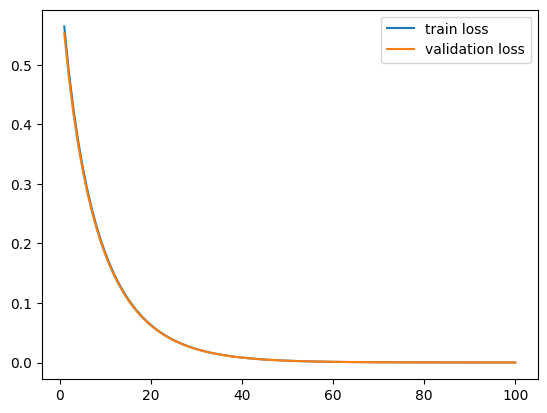

In [12]:
from matplotlib import pyplot as plt

iterations_n = len(results['train']['binary_logloss'])

x = [i + 1 for i in range(iterations_n)]
plt.plot(x, results['train']['binary_logloss'], label='train loss')
plt.plot(x, results['valid']['binary_logloss'], label='validation loss')
plt.legend(loc='upper right')